# First we make a mesh

I used levels lc = [0.4,0.2,0.1,0.05,0.025,0.0125] for levels 1-6

In [215]:
import gmsh
import numpy as np

# Initialize Gmsh
gmsh.initialize()

# Create a new model
gmsh.model.add("2D Square Mesh example")
savefile = "meshes/square_lev06.msh"

# Define the points of the square (x,y,z, meshSize, tag)
lc = 0.0125  # characteristic length for element size
gmsh.model.geo.addPoint(0, 0, 0, meshSize=lc, tag=1)
gmsh.model.geo.addPoint(1, 0, 0, meshSize=lc, tag=2)
gmsh.model.geo.addPoint(1, 1, 0, meshSize=lc, tag=3)
gmsh.model.geo.addPoint(0, 1, 0, meshSize=lc, tag=4)

# Define the lines of the square (startTag, endTag, tag)
gmsh.model.geo.addLine(1, 2, tag=1)
gmsh.model.geo.addLine(2, 3, tag=2)
gmsh.model.geo.addLine(3, 4, tag=3)
gmsh.model.geo.addLine(4, 1, tag=4)

# Create a curve loop using the lines previously defined ([curvetags], tag)
gmsh.model.geo.addCurveLoop([1, 2, 3, 4], 1)

# Create a a plane surface using the curve loop previously defined ([wireTags], tag)
gmsh.model.geo.addPlaneSurface([1], 1)

# Synchronize the internal CAD representation with the Gmsh model
gmsh.model.geo.synchronize()

# Generate 2D mesh (dimenions)
gmsh.model.mesh.generate(2)

# Save the mesh to a file
gmsh.write(savefile)

# Finalize Gmsh
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 60%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.000548358s, CPU 0.000745s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.358162s, CPU 0.340359s)
Info    : 7552 nodes 15106 elements
Info    : Writing 'meshes/square_lev06.msh'...
Info    : Done writing 'meshes/square_lev06.msh'


## and plot the mesh we just made

Info    : Reading 'meshes/square_lev06.msh'...
Info    : 9 entities
Info    : 7552 nodes
Info    : 15106 elements
Info    : Done reading 'meshes/square_lev06.msh'


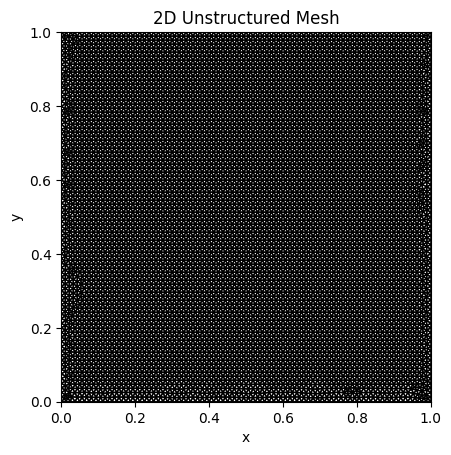

In [216]:
import gmsh
import matplotlib.pyplot as plt

#savefile = "meshes/square_lev05.msh"

# Initialize Gmsh
gmsh.initialize()

# Open the mesh file
gmsh.open(savefile)

# Extract mesh nodes and elements
vertices_tags, vertices_coords, _  = gmsh.model.mesh.getNodes(dim=-1, tag=-1, includeBoundary = False, returnParametricCoord = False)

# Reshape coordinates array
vertices_coords = vertices_coords.reshape(-1, 3)

#elementType=2, 3-node triangle
elements = gmsh.model.mesh.getElementsByType(2)  
element_tags, element_vertices_tags = elements

# Plot using matplotlib
fig, ax = plt.subplots()
for elem_tag in range(len(element_tags)):
    # Get the vertex indices of the i-th element
    elem_vertex_indices = element_vertices_tags[elem_tag * 3:(elem_tag + 1) * 3] - 1  # Convert to zero-based indexing
    
    # Get the coordinates of the element vertices
    triangle = vertices_coords[elem_vertex_indices, :2]
    
    # Create a polygon for the element
    polygon = plt.Polygon(triangle, edgecolor='k', facecolor='none')
    ax.add_patch(polygon)

ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Unstructured Mesh')
plt.show()

# Finalize Gmsh
gmsh.finalize()

# Make a 3D mesh too

In [222]:
import gmsh
import numpy as np

# Initialize Gmsh
gmsh.initialize()

# Create a new model
gmsh.model.add("3D Cube Mesh")
savefile = "meshes/cube_lev06.msh"

# Define the points of the square (x,y,z, meshSize, tag)
lc = 0.0125  # characteristic length for element size
gmsh.model.geo.addPoint(0, 0, 0, lc, 1)
gmsh.model.geo.addPoint(1, 0, 0, lc, 2)
gmsh.model.geo.addPoint(1, 1, 0, lc, 3)
gmsh.model.geo.addPoint(0, 1, 0, lc, 4)
gmsh.model.geo.addPoint(0, 0, 1, lc, 5)
gmsh.model.geo.addPoint(1, 0, 1, lc, 6)
gmsh.model.geo.addPoint(1, 1, 1, lc, 7)
gmsh.model.geo.addPoint(0, 1, 1, lc, 8)

# Define the lines of the cube (startTag, endTag, tag)
gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(2, 3, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 1, 4)
gmsh.model.geo.addLine(5, 6, 5)
gmsh.model.geo.addLine(6, 7, 6)
gmsh.model.geo.addLine(7, 8, 7)
gmsh.model.geo.addLine(8, 5, 8)
gmsh.model.geo.addLine(1, 5, 9)
gmsh.model.geo.addLine(2, 6, 10)
gmsh.model.geo.addLine(3, 7, 11)
gmsh.model.geo.addLine(4, 8, 12)

# Create a curve loop using the lines previously defined ([curvetags], tag)
gmsh.model.geo.addCurveLoop([1, 2, 3, 4], 1)
gmsh.model.geo.addCurveLoop([5, 6, 7, 8], 2)
gmsh.model.geo.addCurveLoop([1, 10, -5, -9], 3)
gmsh.model.geo.addCurveLoop([2, 11, -6, -10], 4)
gmsh.model.geo.addCurveLoop([3, 12, -7, -11], 5)
gmsh.model.geo.addCurveLoop([4, 9, -8, -12], 6)

# Create a a plane surface using the curve loop previously defined ([wireTags], tag)
gmsh.model.geo.addPlaneSurface([1], 1)
gmsh.model.geo.addPlaneSurface([2], 2)
gmsh.model.geo.addPlaneSurface([3], 3)
gmsh.model.geo.addPlaneSurface([4], 4)
gmsh.model.geo.addPlaneSurface([5], 5)
gmsh.model.geo.addPlaneSurface([6], 6)

# Define the volume of the cube
gmsh.model.geo.addSurfaceLoop([1, 2, 3, 4, 5, 6], 1)
gmsh.model.geo.addVolume([1], 1)

# Synchronize the internal CAD representation with the Gmsh model
gmsh.model.geo.synchronize()

# Generate 2D mesh (dimenions)
gmsh.model.mesh.generate(3)

# Save the mesh to a file
gmsh.write(savefile)

def compute_average_edge_length_3d(node_coords, elements):
    edge_lengths = []
    for element in elements:
        for i in range(len(element)):
            for j in range(i + 1, len(element)):
                node1 = node_coords[int(element[i] - 1)]  # Adjust for zero-based indexing
                node2 = node_coords[int(element[j] - 1)]
                edge_length = np.linalg.norm(node1 - node2)
                edge_lengths.append(edge_length)
    return np.mean(edge_lengths)

# Get all nodes and their coordinates
node_tags, node_coords, _ = gmsh.model.mesh.getNodes()
node_coords = node_coords.reshape(-1, 3)  # Reshape to (N, 3) array

# Get all elements (assuming we're working with tetrahedra)
element_tags, element_node_tags = gmsh.model.mesh.getElementsByType(4)
element_node_tags = element_node_tags.reshape(-1, 4)  # Reshape to (N, 4) array

# Compute the average edge length
average_edge_length = compute_average_edge_length_3d(node_coords, element_node_tags)

# Print the estimated characteristic length
print(f"Estimated characteristic length (lc): {average_edge_length}")

# Finalize Gmsh
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 60%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.00200805s, CPU 0.002017s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : [ 40%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [ 60%] Meshing surface 4 (Plane, Frontal-Delaunay)
Info    : [ 70%] Meshing surface 5 (Plane, Frontal-Delaunay)
Info    : [ 90%] Meshing surface 6 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 2.13295s, C

## Since I forgot to save the lc variables I used, here is code that can guess it for a given mesh

In [190]:
def compute_average_edge_length_2d(node_coords, elements):
    edge_lengths = []
    for element in elements:
        for i in range(len(element)):
            for j in range(i + 1, len(element)):
                node1 = node_coords[int(element[i] - 1)]  # Adjust for zero-based indexing
                node2 = node_coords[int(element[j] - 1)]
                edge_length = np.linalg.norm(node1 - node2)
                edge_lengths.append(edge_length)
    return np.mean(edge_lengths)

# Initialize Gmsh
gmsh.initialize()

# Open an existing mesh file
gmsh.open("meshes/square_lev05.msh")

# Get all nodes and their coordinates
node_tags, node_coords, _ = gmsh.model.mesh.getNodes()
node_coords = node_coords.reshape(-1, 3)[:, :2]  # Reshape to (N, 3) array and take only the x, y coordinates

# Get elements of the identified type
element_tags, element_node_tags = gmsh.model.mesh.getElementsByType(2)
element_node_tags = element_node_tags.reshape(-1, 3)  # Reshape to (N, 3) array

# Compute the average edge length
average_edge_length = compute_average_edge_length_2d(node_coords, element_node_tags)

# Print the estimated characteristic length
print(f"Estimated characteristic length (lc): {average_edge_length}")

# Finalize Gmsh
gmsh.finalize()

Info    : Reading 'meshes/square_lev05.msh'...
Info    : 9 entities
Info    : 230 nodes
Info    : 462 elements
Info    : Done reading 'meshes/square_lev05.msh'
Estimated characteristic length (lc): 0.07572264393103936


# Now let's work with a given mesh to do stuff

In [120]:
from get_hicken_op import getOps2D

p = 2
q = 4
op_type = "Omega"
fac_nodes = "lg" # 2D

Dx, Dy, Qx, Qy, H, Ex, Ey, xy, xf, B, N, R = getOps2D(p, q, op_type, fac_nodes)

In [121]:
# Initialize Gmsh
gmsh.initialize()

# Open the mesh file
gmsh.open("meshes/square_lev03.msh")

# Extract mesh nodes and elements
vertices = gmsh.model.mesh.getNodes(dim=-1, tag=-1, includeBoundary = False, returnParametricCoord = False)
vertices_tags, vertices_coords, _ = vertices

# Reshape coordinates array
vertices_coords = vertices_coords.reshape(-1, 3)

#elementType=2, 3-node triangle
element_tags, element_vertices_tags = gmsh.model.mesh.getElementsByType(2)  

# Finalize Gmsh
gmsh.finalize()

Info    : Reading 'meshes/square_lev03.msh'...
Info    : 9 entities
Info    : 30 nodes
Info    : 62 elements
Info    : Done reading 'meshes/square_lev03.msh'


get the affine mapping for each element in the mesh

In [122]:
num_elem = len(element_tags)
affine_map = np.zeros((2,3,num_elem))
for elem_idx in range(num_elem): 
    # Get the vertex indices of the i-th element
    elem_vertex_indices = element_vertices_tags[elem_idx * 3:(elem_idx + 1) * 3] - 1  # Convert to zero-based indexing
    
    # Get the physical (mapped) coordinates of the element vertices
    p_phys = vertices_coords[elem_vertex_indices, :2].T

    # The reference vertex coordinates are (-1,-1), (1,-1), (-1,1).
    # The below is a row of xi, a row of eta, and a row of ones (for +b part of affine trans.)
    p_ref = np.array([[-1.,1.,-1.],[-1.,-1.,1.],[1.,1.,1.]])

    affine_map[:,:,elem_idx] = np.dot(p_phys, np.linalg.inv(p_ref))

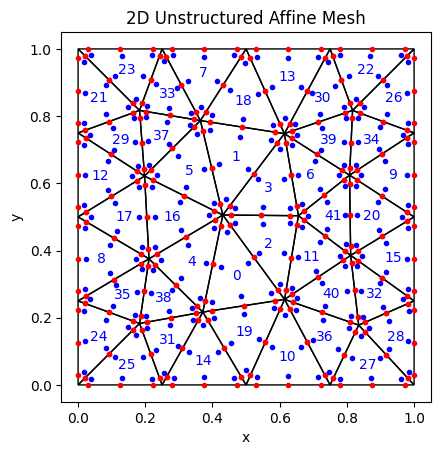

In [123]:
# store array of mesh nodes based on sbp reference operator
xy_affine = np.zeros((*xy.shape,len(element_tags)))
xf_affine = np.zeros((*xf.shape,len(element_tags)))

# Plot using matplotlib
fig, ax = plt.subplots()
for elem_idx in range(len(element_tags)):
    elem_tag = element_tags[elem_idx]

    # Get the vertex indices (in the main vertices array) for the i-th element = vertices tags - 1
    elem_vertex_idcs = element_vertices_tags[elem_idx * 3:(elem_idx + 1) * 3] - 1  # Convert to zero-based indexing
    
    # Get the coordinates of the element vertices
    triangle = vertices_coords[elem_vertex_idcs, :2]
    
    # Create a polygon for the element
    polygon = plt.Polygon(triangle, edgecolor='k', facecolor='none')
    ax.add_patch(polygon)

    # Calculate the centroid of the triangle and place the tag ontop
    centroid = np.mean(triangle, axis=0)
    #ax.text(centroid[0], centroid[1], str(elem_idx)+"("+str(elem_tag)+")", color='blue', ha='center', va='center')
    ax.text(centroid[0], centroid[1], str(elem_idx), color='blue', ha='center', va='center')

    # get physical (affine) nodes and store
    affine_nodes = affine_map[:,:2,elem_idx] @ xy + affine_map[:,2,elem_idx].reshape((2,1))
    xy_affine[:,:,elem_idx] = affine_nodes
    ax.scatter(affine_nodes[0, :], affine_nodes[1, :], marker='.', color='b', label='Volume nodes')

    for f in [0,1,2]:
        affine_nodes_fac = affine_map[:,:2,elem_idx] @ xf[:,:,f] + affine_map[:,2,elem_idx].reshape((2,1))
        xf_affine[:,:,f,elem_idx] = affine_nodes_fac
        ax.scatter(affine_nodes_fac[0, :], affine_nodes_fac[1, :], marker='.', color='r', label='Facet nodes')

ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Unstructured Affine Mesh')
plt.show()

In [124]:
xmin = [0.,0.]
xmax = [1.,1.]
dom_len = [xmax[0]-xmin[0],xmax[1]-xmin[1]]
warp_factor = 0.15

def warp_coordinates(xy):
    new_xy = np.zeros_like(xy)
    argx = (xy[0]-xmin[0])/dom_len[0]
    argy = (xy[1]-xmin[1])/dom_len[1]
    x_t = argx + warp_factor*np.sin(np.pi*argx)*np.sin(np.pi*argy)
    y_t = argy + warp_factor*np.exp(1-argx)*np.sin(np.pi*argx-0.75)*np.sin(np.pi*argy) 
    new_xy[0] = x_t*dom_len[0] + xmin[0]
    new_xy[1] = y_t*dom_len[1] + xmin[1]
    return new_xy

xy_physical = warp_coordinates(xy_affine)
xf_physical = warp_coordinates(xf_affine)

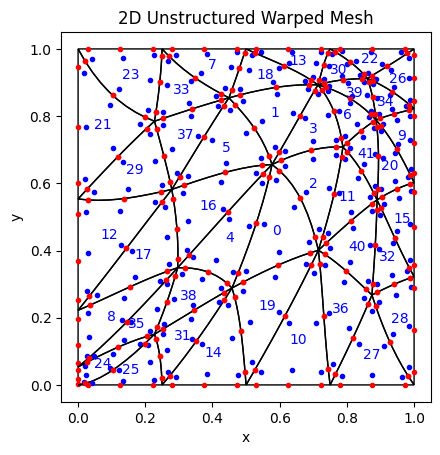

In [125]:
plot_affine = False

def interpolate_edge(p1, p2, num_points=10):
    t = np.linspace(0, 1, num_points)
    return (1 - t)[:, None] * p1 + t[:, None] * p2

# Plot using matplotlib
fig, ax = plt.subplots()
for elem_idx in range(len(element_tags)):
    # Get the vertex indices of the i-th element
    elem_vertex_idcs = element_vertices_tags[elem_idx * 3:(elem_idx + 1) * 3] - 1  # Convert to zero-based indexing
    
    # Get the coordinates of the element vertices
    triangle = vertices_coords[elem_vertex_idcs, :2]

    if plot_affine:
        # Create a polygon for the original affine mesh element
        polygon = plt.Polygon(triangle, edgecolor='k', facecolor='none', alpha=0.1)
        ax.add_patch(polygon)

    # Interpolate points along each edge of the triangle
    edge1 = interpolate_edge(triangle[0], triangle[1])
    edge2 = interpolate_edge(triangle[1], triangle[2])
    edge3 = interpolate_edge(triangle[2], triangle[0])

    # Combine the edges to form a smoother polygon
    smooth_triangle = np.vstack([edge1, edge2, edge3])

    # Plot the warped mesh elements
    warped_triangle = warp_coordinates(smooth_triangle.T).T
    warped_polygon = plt.Polygon(warped_triangle, edgecolor='k', facecolor='none')
    ax.add_patch(warped_polygon)

    ax.scatter(xy_physical[0, :, elem_idx], xy_physical[1, :, elem_idx], marker='.', color='b', label='Volume nodes')

    for f in [0,1,2]:
        ax.scatter(xf_physical[0, :, f, elem_idx], xf_physical[1, :, f, elem_idx], marker='.', color='r', label='Facet nodes')

    # Calculate the centroid of the triangle and place the tag ontop
    centroid = np.mean(warped_triangle, axis=0)
    #ax.text(centroid[0], centroid[1], str(elem_idx)+"("+str(elem_tag)+")", color='blue', ha='center', va='center')
    ax.text(centroid[0], centroid[1], str(elem_idx), color='blue', ha='center', va='center')

ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Unstructured Warped Mesh')
plt.show()

In [70]:
# Function to find adjacent elements
def find_adjacent_elements(elem_idx, element_tags, element_vertices_tags):
    
    # Get the vertices of the given element
    elem_vertex_idcs = element_vertices_tags[elem_idx * 3:(elem_idx + 1) * 3] - 1
    
    # Find elements that share at least one node
    adjacent_elements = []
    loc_facet_idcs = []
    ghost_facet_idcs = []
    for elem_idx2 in range(len(element_tags)):
        if elem_idx2 == elem_idx:
            continue  # Skip the element itself
        else:
            elem_vertex_idcs2 = element_vertices_tags[elem_idx2 * 3:(elem_idx2 + 1) * 3] - 1
            vtcs = np.intersect1d(elem_vertex_idcs, elem_vertex_idcs2)
            if vtcs.size == 2:
                adjacent_elements.append(elem_idx2)
                if (vtcs == np.sort(elem_vertex_idcs[:2])).all():
                    loc_facet_idcs.append(0)
                elif (vtcs == np.sort(elem_vertex_idcs[1:])).all():
                    loc_facet_idcs.append(1)
                elif (vtcs == np.sort(elem_vertex_idcs[[0,2]])).all():
                    loc_facet_idcs.append(2)
                else:
                    print("something went wrong with local indices")
                if (vtcs == np.sort(elem_vertex_idcs2[:2])).all():
                    ghost_facet_idcs.append(0)
                elif (vtcs == np.sort(elem_vertex_idcs2[1:])).all():
                    ghost_facet_idcs.append(1)
                elif (vtcs == np.sort(elem_vertex_idcs2[[0,2]])).all():
                    ghost_facet_idcs.append(2)
                else:
                    print("something went wrong with local indices")

    
    return adjacent_elements, loc_facet_idcs, ghost_facet_idcs

# Example element index
element_idx = 16

# Find adjacent elements
adjacent_elements, loc_facet_idcs, ghost_facet_idcs = find_adjacent_elements(element_idx, element_tags, element_vertices_tags)
print(f"Adjacent elements to element {element_idx} are: {adjacent_elements}")
print(f"the corresponding local facet indices are: {loc_facet_idcs}")
print(f"              ... ghost facet indices are: {ghost_facet_idcs}")


# Example element index
element_idx = 21

# Find adjacent elements
adjacent_elements, loc_facet_idcs, ghost_facet_idcs = find_adjacent_elements(element_idx, element_tags, element_vertices_tags)
print(f"Adjacent elements to element {element_idx} are: {adjacent_elements}")
print(f"the corresponding local facet indices are: {loc_facet_idcs}")
print(f"              ... ghost facet indices are: {ghost_facet_idcs}")

Adjacent elements to element 16 are: [2, 8, 21]
the corresponding local facet indices are: [0, 2, 1]
              ... ghost facet indices are: [2, 1, 2]
Adjacent elements to element 21 are: [0, 16, 22]
the corresponding local facet indices are: [0, 2, 1]
              ... ghost facet indices are: [2, 1, 2]


In [143]:
element_tags.shape

(42,)

In [146]:
element_vertices_tags

array([19, 22, 23, 17, 22, 24, 22, 19, 26, 24, 22, 26, 22, 18, 23, 17, 21,
       22, 20, 24, 26, 12, 13, 17, 15, 16, 18,  9, 10, 20,  6,  7, 19, 19,
       25, 26, 14, 15, 21, 11, 12, 24,  5,  6, 23,  8,  9, 25, 21, 18, 22,
       15, 18, 21, 12, 17, 24,  6, 19, 23,  9, 20, 25,  4, 14, 27,  3, 11,
       28, 13,  4, 27, 16,  1, 29,  1,  5, 29, 10,  3, 28,  7,  2, 30,  2,
        8, 30, 14, 21, 27, 11, 24, 28,  5, 23, 29,  8, 25, 30, 17, 13, 27,
       20, 10, 28, 18, 16, 29, 19,  7, 30, 21, 17, 27, 23, 18, 29, 24, 20,
       28, 25, 19, 30, 25, 20, 26], dtype=uint64)

In [145]:
126/3

42.0

In [136]:
# Initialize Gmsh
gmsh.initialize()

# Open the mesh file
gmsh.open(savefile)

# Extract mesh nodes and elements
vertices_tags, vertices_coords, _  = gmsh.model.mesh.getNodes(dim=-1, tag=-1, includeBoundary = False, returnParametricCoord = False)

# Reshape coordinates array
vertices_coords = vertices_coords.reshape(-1, 3)

Info    : Reading 'square_mesh.msh'...
Info    : 9 entities
Info    : 12 nodes
Info    : 26 elements
Info    : Done reading 'square_mesh.msh'


In [142]:
vertices_coords[:,:2]

array([[0.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 1.        ],
       [0.        , 1.        ],
       [0.5       , 0.        ],
       [1.        , 0.5       ],
       [0.5       , 1.        ],
       [0.        , 0.5       ],
       [0.29375   , 0.70625   ],
       [0.375     , 0.375     ],
       [0.64791667, 0.64375   ],
       [0.71875   , 0.28125   ]])